# <center> Standing Waves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import animation
from matplotlib.animation import FuncAnimation

### Wave interference
When two travelling waves interact with each other, they make an interference pattern. The interference could be constructive or destructive or somewhat in between. Cosntructive interference happens when crest or trough of both waves occur at the same. Suppose two identical waves (same frequency and wavelength) but travelling in opposite directions. The interference results into *standing waves*. The standing wave doesn't travel through space but only oscillates in time with the frequency of either wave. 

Mathematically, a wave travelling in the right direction (positive x-axis) can be written as;
* $$ y = y_0 \sin(\frac{2\pi x}{\lambda} - 2\pi\omega)$$
* $$ y = y_0 \sin(kx - wt)$$
And the same wave but travelling in left direction is given by
* $$ y = y_0 \sin(\frac{2\pi x}{\lambda} + 2\pi\omega)$$
* $$ y = y_0 \sin(kx + wt)$$
Where $k$ and $w$ are angular terms equivlent of $\lambda$ and $f$.
> The mathematical sum of these both waves produces *standing waves* [wikipedia](https://en.wikipedia.org/wiki/Standing_wave).
* $$ y = 2y_0 \sin(\frac{2\pi x}{\lambda}) \cos(\omega t) $$

In [2]:
lamb = 5                  # wavelength of either wave
k = 2*np.pi/lamb          # wavenumber 
f = 5                     # frequency
w = 2*np.pi*f
def f1(x,t):      
    return np.sin(k*x-w*t)     # wave propagating in positive x-direction
def f2(x,t):
    return np.sin(k*x + w*t)     # wave travelling in negative x-direction (left direction)

def f(x,t):
    return np.sin(k*x - w*t) + np.sin(k*x + w*t)     # Adding opposite direction waves togather

x = np.linspace(0, 30, 1000)
t = np.arange(0, 10, 1/60)
X, T = np.meshgrid(x, t)         # grid to move wave in time
F1 = f1(X, T)
F2 = f2(X, T)
F = f(X, T)

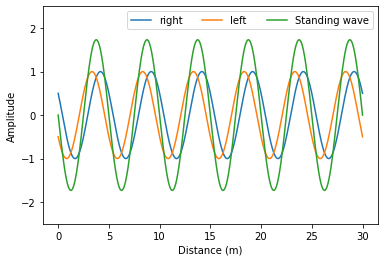

In [3]:
fig, ax = plt.subplots()
ax.plot(x, F1[7], label = 'right')
ax.plot(x, F2[7], label = 'left')
ax.plot(x, F[7], label = 'Standing wave')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Amplitude')
ax.legend(ncol = 3); ax.set_ylim([-2.5, 2.5])
plt.show()

<IPython.core.display.Javascript object>


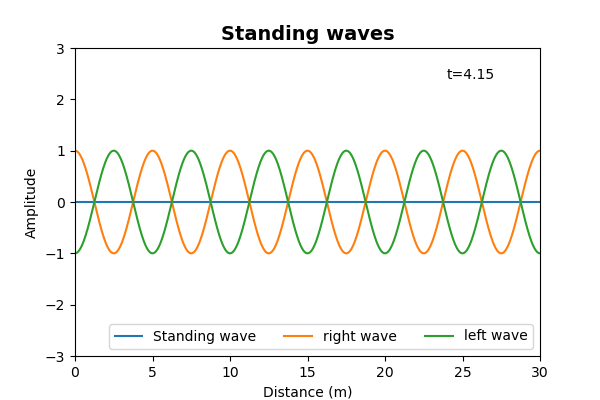

In [4]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(6,4))
ln1, = ax.plot([], [], label = 'Standing wave')
ln2, = ax.plot([], [], label = 'right wave')
ln3, = ax.plot([], [], label = 'left wave')
time_text = ax.text(0.80, 0.90, '', fontsize=10,
                    bbox=dict(facecolor='white', edgecolor='none'), 
                    transform=ax.transAxes)
ax.set_xlim(0,30)
ax.set_ylim(-3, 3)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Amplitude')
ax.set_title('Standing waves', fontsize = 14, weight = 'bold')
ax.legend(loc = 'lower right', ncol = 3)

def animate(i):
    ln1.set_data(x, F[i])
    ln2.set_data(x, F1[i])
    ln3.set_data(x, F2[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=250, interval=100, repeat = False)
#ani.save('Standing waves3.mp4', dpi = 150, fps = 10, writer = 'ffmpeg')  # to save the animation